In [69]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import save_img

from sklearn.decomposition import FastICA

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

from matplotlib.image import imread
from PIL import Image

import gmplot as gp

In [70]:
n_classes = 4

In [71]:
# path = r"C:\Users\mouju\Downloads\archive\flower_images\flower_images"
# path = r"C:\Users\mouju\Downloads\archive\crop_images\crop_images"

# path = r"C:\Users\mouju\Desktop\film\saga_data\chips_test"
# path = r"C:\Users\mouju\Desktop\film\geomorph_data_test_chips"
path = r"C:\Users\mouju\Desktop\film\saga_data_chips_try"

In [72]:
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
crops = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the crops list
            crops.append(file.name)
            

In [73]:
img = np.array(load_img(crops[0]))
image_dim = np.prod(img.shape)

input = np.zeros([image_dim, len(crops)])

In [74]:
input.shape

(3072, 60)

In [75]:
input_try = np.random.rand(image_dim, len(crops))

In [76]:
with os.scandir(path) as files:
  # loops through each file in the directory
    it = 0
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the crops list
            input[:, it] = np.array(load_img(crops[0])).flatten()
            it += 1

In [77]:
np.isfinite(input).all() # no values in input are inf or nan

True

In [90]:
# transformer = FastICA(n_components=n_classes, random_state=0, max_iter= 1000)
transformer = FastICA(n_components=n_classes)

sources = transformer.fit_transform(input.T)
mix = transformer.mixing_

c:\users\mouju\appdata\local\programs\python\python38\lib\site-packages\sklearn\decomposition\_fastica.py:482: RuntimeWarning: divide by zero encountered in true_divide
  K = (u / d).T[:n_components]  # see (6.33) p.140
c:\users\mouju\appdata\local\programs\python\python38\lib\site-packages\sklearn\decomposition\_fastica.py:482: RuntimeWarning: invalid value encountered in true_divide
  K = (u / d).T[:n_components]  # see (6.33) p.140


ValueError: array must not contain infs or NaNs

In [82]:
sources.shape

(3072, 4)

In [84]:
transformer.mean_.shape

(60,)

In [88]:
fels_mean = np.load(r'C:\Users\mouju\Desktop\film\components_analysis\fels_ica\mean.npy')

In [89]:
fels_mean.shape

(52,)

In [6]:
            
            
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    
    #convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
#     img = np.load(file)
#     print(img.shape)
    
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # reshaped_img = img.reshape(1,img.shape[1],img.shape[2],1)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [7]:
   
data = {}
# p = r"C:\Users\mouju\Downloads\archive\crop_images\vec"
# p = r"C:\Users\mouju\Desktop\film\saga_data\vec"
p = os.path.join(path, "vec")

# lop through each image in the dataset
for crop in crops:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(crop,model)
        data[crop] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          # get a list of the filenames

filenames = np.array(list(data.keys()))

In [8]:
len(filenames)

561

In [9]:
filenames

array(['0000.png', '0001.png', '0002.png', '0003.png', '0004.png',
       '0005.png', '0006.png', '0007.png', '0008.png', '0009.png',
       '0010.png', '0011.png', '0012.png', '0013.png', '0014.png',
       '0015.png', '0016.png', '0017.png', '0018.png', '0019.png',
       '0020.png', '0021.png', '0022.png', '0023.png', '0024.png',
       '0025.png', '0026.png', '0027.png', '0028.png', '0029.png',
       '0030.png', '0031.png', '0032.png', '0033.png', '0034.png',
       '0035.png', '0036.png', '0037.png', '0038.png', '0039.png',
       '0040.png', '0041.png', '0042.png', '0043.png', '0044.png',
       '0045.png', '0046.png', '0047.png', '0048.png', '0049.png',
       '0050.png', '0051.png', '0052.png', '0053.png', '0054.png',
       '0055.png', '0056.png', '0057.png', '0058.png', '0059.png',
       '0060.png', '0061.png', '0062.png', '0063.png', '0064.png',
       '0065.png', '0066.png', '0067.png', '0068.png', '0069.png',
       '0070.png', '0071.png', '0072.png', '0073.png', '0074.p

c:\users\mouju\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\mouju\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\mouju\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\mouju\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be r

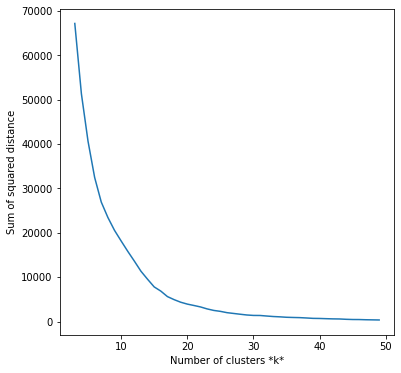

In [10]:
# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

# get the unique labels (from the crop_labels.csv)
# df = pd.read_csv('crop_labels.csv')
# label = df['label'].tolist()
# unique_labels = list(set(label))


# reduce the amount of dimensions in the feature vector
# pca = PCA(n_components=100, random_state=22)
pca = PCA(n_components=10, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

# cluster feature vectors
kmeans = KMeans(n_clusters=n_classes,n_jobs=-1, random_state=22)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')
        
   
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22, n_jobs=-1)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');
        

In [11]:
len(groups)

4

In [12]:
len(groups[0])

485

In [13]:
file = groups[0][0]
file

'0000.png'

In [14]:
chip = os.path.join(path, file)
chip_image = imread(chip)

In [15]:
chip_image.shape

(32, 32, 3)

In [16]:
plt.figure()

for group_id in groups:
    print(group_id)
    group = groups[group_id]
    n = len(group)

    accumulator = np.zeros(chip_image.shape)
    for file in group:

        chip = os.path.join(path, file)
        # chip_image = Image.open(chip)
        chip = np.array(load_img(chip))
        accumulator += chip / n

    save_img(os.path.join(path, "cluster_means", f'{group_id:03d}.png'), accumulator)
    plt.subplot

0
2
3
1


<Figure size 432x288 with 0 Axes>

In [17]:
with open(r'C:\Users\mouju\Desktop\film\components_analysis\apikey.txt') as f:
    apikey = f.readlines()[0]

In [18]:
df = pd.read_csv(r"C:\Users\mouju\Desktop\film\components_analysis\df_unique.csv", header=[0])

In [19]:
mean_lat = df.latitude.mean()
mean_lng = df.longitude.mean()

In [20]:
gmap = gp.GoogleMapPlotter(mean_lat, mean_lng, 8, apikey = apikey)

In [21]:
import seaborn as sns
palette = sns.color_palette(None, n_classes)

In [22]:
import seaborn as sns
palette = sns.color_palette(None, n_classes)

In [23]:
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)]

In [24]:
print(palette.as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


In [25]:
colour_hex = [None] * len(df)

# for i, file in enumerate(filenames):
#     print(list(groups.keys())[list(groups.values()).index(i)])

for group_id, group in groups.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    for file in group:
        ind =  int(file.split('.')[0])
        colour_hex[ind] = palette.as_hex()[group_id]

In [26]:
colour_hex

['#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1

In [27]:
gmap.scatter(list(df.latitude), list(df.longitude), size = 50, color=colour_hex, marker=False) 


gmap.draw(os.path.join(path,'clusters.html') )

In [28]:
sum(np.array(colour_hex) == '#1f77b4')

485

In [29]:
sum(np.array(colour_hex) != '#1f77b4')

76